In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [2]:
dir_aceite="aceite.xls"
dir_alcohol="alcohol.xls"
dir_lavandina="lavandina.xls"
dir_agua="agua.xls"
dir_aguacaliente="aguacaliente.xls"
dir_vacio="vacio.xls"

aceite=pd.read_excel(dir_aceite,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
alcohol=pd.read_excel(dir_alcohol,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
lavandina=pd.read_excel(dir_lavandina,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
agua=pd.read_excel(dir_agua,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
aguacaliente=pd.read_excel(dir_aguacaliente,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
vacio=pd.read_excel(dir_vacio,header=1,usecols=["Valor_R","Valor_V","Valor_A"])



aceite.drop(0, inplace=True)
alcohol.drop(0, inplace=True)
lavandina.drop(0, inplace=True)
agua.drop(0, inplace=True)
aguacaliente.drop(0, inplace=True)
vacio.drop(0, inplace=True)


aceite["etiqueta"]=0
alcohol["etiqueta"]=1
lavandina["etiqueta"]=2
agua["etiqueta"]=3
aguacaliente["etiqueta"]=4
vacio["etiqueta"]=5


df=pd.concat([aceite,alcohol,lavandina,agua,aguacaliente,vacio], axis=0,ignore_index=True)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], pd.get_dummies(df["etiqueta"]), test_size = 0.3, stratify = df["etiqueta"])

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
def create_model():
    model = Sequential()
    model.add(Dense(6, input_dim=3,activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [6]:
history = model.fit(X_train, y_train,epochs=400,validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9809 - val_loss: 0.0771 - val_accuracy: 0.9783
Epoch 2/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.9824 - val_loss: 0.0704 - val_accuracy: 0.9933
Epoch 3/400
132/132 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9812 - val_loss: 0.0924 - val_accuracy: 0.9700
Epoch 4/400
132/132 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9838 - val_loss: 0.0911 - val_accuracy: 0.9700
Epoch 5/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9836 - val_loss: 0.0681 - val_accuracy: 0.9922
Epoch 6/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9852 - val_loss: 0.0795 - val_accuracy: 0.9767
Epoch 7/400
132/132 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9821 - val_loss: 0.1225 - val_accuracy: 0.9383

Epoch 58/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9845 - val_loss: 0.0685 - val_accuracy: 0.9839
Epoch 59/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9862 - val_loss: 0.0900 - val_accuracy: 0.9744
Epoch 60/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9800 - val_loss: 0.0629 - val_accuracy: 0.9883
Epoch 61/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9859 - val_loss: 0.0700 - val_accuracy: 0.9844
Epoch 62/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9907 - val_loss: 0.0704 - val_accuracy: 0.9928
Epoch 63/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9874 - val_loss: 0.0609 - val_accuracy: 0.9894
Epoch 64/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9895 - val_loss: 0.0671 - val_accuracy:

132/132 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9878 - val_loss: 0.0685 - val_accuracy: 0.9922
Epoch 115/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9900 - val_loss: 0.0664 - val_accuracy: 0.9828
Epoch 116/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9897 - val_loss: 0.0742 - val_accuracy: 0.9767
Epoch 117/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9883 - val_loss: 0.0595 - val_accuracy: 0.9855
Epoch 118/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9886 - val_loss: 0.0609 - val_accuracy: 0.9950
Epoch 119/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9907 - val_loss: 0.0629 - val_accuracy: 0.9828
Epoch 120/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9881 - val_loss: 0.0582 - val_accuracy: 0.9906

132/132 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9909 - val_loss: 0.0541 - val_accuracy: 0.9933
Epoch 171/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9878 - val_loss: 0.0637 - val_accuracy: 0.9967
Epoch 172/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9890 - val_loss: 0.0514 - val_accuracy: 0.9956
Epoch 173/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9890 - val_loss: 0.0510 - val_accuracy: 0.9933
Epoch 174/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9897 - val_loss: 0.0516 - val_accuracy: 0.9939
Epoch 175/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9914 - val_loss: 0.0609 - val_accuracy: 0.9833
Epoch 176/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9895 - val_loss: 0.0652 - val_accuracy: 0.9878

132/132 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9921 - val_loss: 0.0523 - val_accuracy: 0.9933
Epoch 227/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9897 - val_loss: 0.0696 - val_accuracy: 0.9933
Epoch 228/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9897 - val_loss: 0.0542 - val_accuracy: 0.9867
Epoch 229/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9912 - val_loss: 0.0545 - val_accuracy: 0.9872
Epoch 230/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9924 - val_loss: 0.0482 - val_accuracy: 0.9911
Epoch 231/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9897 - val_loss: 0.0464 - val_accuracy: 0.9944
Epoch 232/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9902 - val_loss: 0.0678 - val_accuracy: 0.9778

132/132 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9914 - val_loss: 0.0501 - val_accuracy: 0.9889
Epoch 283/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9893 - val_loss: 0.0537 - val_accuracy: 0.9950
Epoch 284/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9914 - val_loss: 0.0470 - val_accuracy: 0.9961
Epoch 285/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9926 - val_loss: 0.0501 - val_accuracy: 0.9928
Epoch 286/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9888 - val_loss: 0.0450 - val_accuracy: 0.9939
Epoch 287/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9926 - val_loss: 0.0471 - val_accuracy: 0.9944
Epoch 288/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9917 - val_loss: 0.0480 - val_accuracy: 0.9972

132/132 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9921 - val_loss: 0.0452 - val_accuracy: 0.9911
Epoch 339/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9917 - val_loss: 0.0401 - val_accuracy: 0.9950
Epoch 340/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9921 - val_loss: 0.1070 - val_accuracy: 0.9422
Epoch 341/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9895 - val_loss: 0.0477 - val_accuracy: 0.9928
Epoch 342/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9914 - val_loss: 0.0662 - val_accuracy: 0.9789
Epoch 343/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9917 - val_loss: 0.0461 - val_accuracy: 0.9911
Epoch 344/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9931 - val_loss: 0.0439 - val_accuracy: 0.9967

132/132 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9933 - val_loss: 0.0390 - val_accuracy: 0.9961
Epoch 395/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9936 - val_loss: 0.0379 - val_accuracy: 0.9950
Epoch 396/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9928 - val_loss: 0.0376 - val_accuracy: 0.9961
Epoch 397/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9933 - val_loss: 0.0409 - val_accuracy: 0.9944
Epoch 398/400
132/132 [==============================] - 1s 5ms/step - loss: 0.0500 - accuracy: 0.9909 - val_loss: 0.0408 - val_accuracy: 0.9939
Epoch 399/400
132/132 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9933 - val_loss: 0.0444 - val_accuracy: 0.9906
Epoch 400/400
57/57 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9939


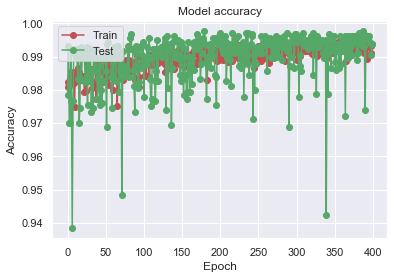

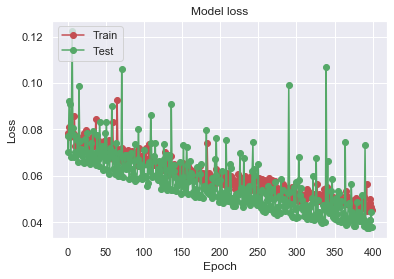

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


plt.plot(history.history['accuracy'],'o-', color="r",label="Training score")
plt.plot(history.history['val_accuracy'], 'o-', color="g",label="Test score")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'],'o-', color="r",label="Training score")
plt.plot(history.history['val_loss'], 'o-', color="g",label="Test score")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Text(111.5, 0.5, 'true')

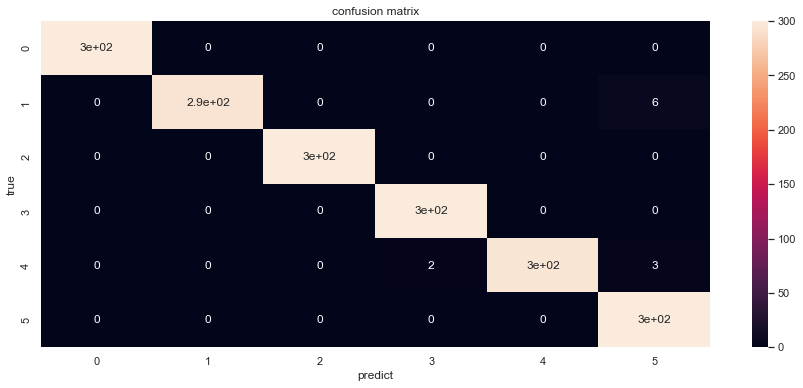

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
f,ax=plt.subplots(figsize=(15,6))

y_pred=model.predict(X_test)
C2= confusion_matrix(np.argmax(y_test.to_numpy(), axis=1),np.argmax(y_pred, axis=1))

sns.heatmap(C2,annot=True,ax=ax) #Dibuja un mapa de calor

ax.set_title('confusion matrix') #título
ax.set_xlabel('predict') #eje x
ax.set_ylabel('true') #eje y

In [9]:
parameters = {'batch_size': [16,32,64], 'epochs':[70,100,400,500,1000]}

In [12]:
estimator = KerasClassifier(build_fn=create_model, verbose=0)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='roc_auc_ovr', cv=10,n_jobs=-1)

C:\Users\ADMIN1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [13]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


{'batch_size': 32, 'epochs': 1000}

In [14]:
best_epochs= grid_search.best_params_['epochs']
best_batch= grid_search.best_params_['batch_size']

# Validacion Cruzada

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], pd.get_dummies(df["etiqueta"]), test_size = 0.1, stratify = df["etiqueta"])

In [16]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

estimator = KerasClassifier(build_fn=create_model, verbose=2, batch_size=best_batch, epochs=best_epochs)

accuracies = cross_val_score(estimator, X_train,  y_train, cv=10, n_jobs=-1)
mean_acc = accuracies.mean()
variance_acc = accuracies.std()
print('Precision media: ', mean_acc,"+/-",variance_acc)

C:\Users\ADMIN1\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.


Precision media:  0.9946251571178436 +/- 0.0028031163031379397


In [8]:
weights = model.get_weights()
weights

[array([[-0.8861446 , -0.52088356,  0.00647437,  0.36500728,  0.64274305,
          0.01488596],
        [-0.0070371 , -0.14112243, -1.1149462 , -0.38017127, -0.4926682 ,
         -0.23621184],
        [ 0.512649  ,  0.29512385,  0.803464  , -0.64011407, -0.73263407,
         -0.26988554]], dtype=float32),
 array([  0.7967504,  -2.7841663,  -1.3072125,  13.043794 , -11.35957  ,
         -1.5768006], dtype=float32)]